# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | cukai
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | steinbach
Processing Record 6 of Set 1 | piti village
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | nasiriyah
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | tamanrasset
Processing Record 12 of Set 1 | beyneu
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | la passe
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | kushikino
Processing Record 17 of Set 1 | nemuro
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | tazovsky
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | isafjordur
Processing Record 22 of Set 1 | taio

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.82,73,17,5.04,PN,1712461804
1,cukai,4.2500,103.4167,30.97,60,48,2.74,MY,1712461804
2,edinburgh of the seven seas,-37.0676,-12.3116,18.80,95,99,9.75,SH,1712461804
3,kavaratti,10.5669,72.6420,29.07,70,98,1.27,IN,1712461804
4,steinbach,50.1667,8.5667,16.47,69,99,3.84,DE,1712461804


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.82,73,17,5.04,PN,1712461804
1,cukai,4.2500,103.4167,30.97,60,48,2.74,MY,1712461804
2,edinburgh of the seven seas,-37.0676,-12.3116,18.80,95,99,9.75,SH,1712461804
3,kavaratti,10.5669,72.6420,29.07,70,98,1.27,IN,1712461804
4,steinbach,50.1667,8.5667,16.47,69,99,3.84,DE,1712461804


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# Look for the date
dates_pd = pd.DataFrame(city_data_df["Date"])
for i, row in dates_pd.iterrows():
    year,month,day,*_ = time.gmtime(row["Date"])
    dates_pd.loc[i,"Date2"] = (f"{year}-{month}-{day}")
dates_pd["Date2"].unique()
date = dates_pd["Date2"].unique()
date

array(['2024-4-7'], dtype=object)

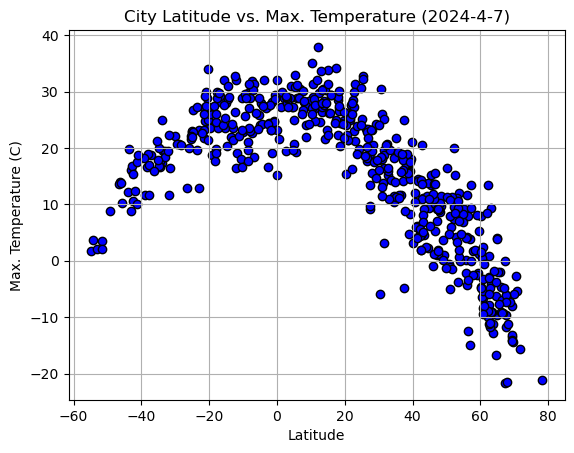

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,color="b",edgecolors="black")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max. Temperature ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

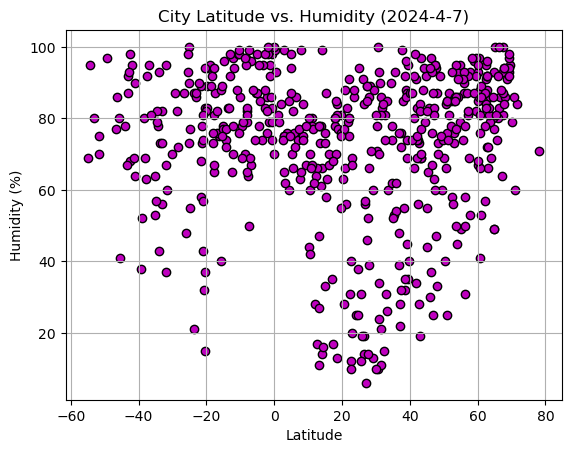

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,color="m", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

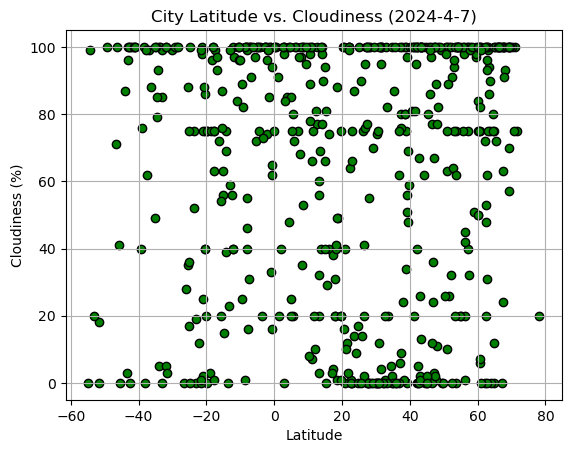

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,color="g",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

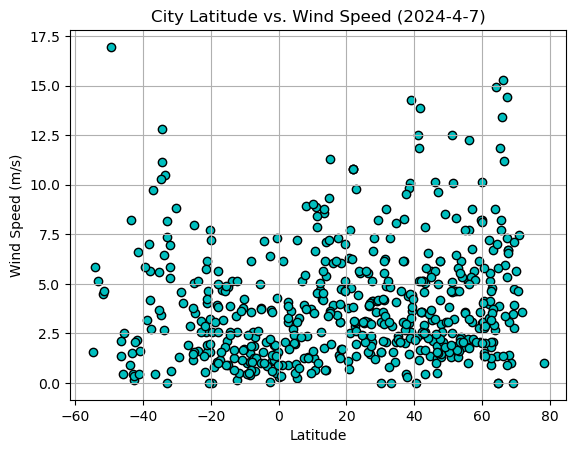

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,color="c",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def linear_reg_plots(x_values, y_values, hemis, y_label, color, fig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    regress_values = x_values * slope + intercept
    plt.scatter(x_values,y_values,color=color,edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"City Latitude vs. {(y_values).name} - {hemis}")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=10,color="r",
                 bbox=dict(boxstyle="square,pad=0.2", fc="white", lw=0.5))
    print(f"The r-value is: {rvalue}")
    plt.savefig(f"output_data/Fig{fig}.png")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cukai,4.2500,103.4167,30.97,60,48,2.74,MY,1712461804
3,kavaratti,10.5669,72.6420,29.07,70,98,1.27,IN,1712461804
4,steinbach,50.1667,8.5667,16.47,69,99,3.84,DE,1712461804
5,piti village,13.4626,144.6933,30.49,73,69,8.56,GU,1712461804
7,nasiriyah,31.0521,46.2610,26.02,24,12,5.55,IQ,1712461804


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.82,73,17,5.04,PN,1712461804
2,edinburgh of the seven seas,-37.0676,-12.3116,18.80,95,99,9.75,SH,1712461804
6,port-aux-francais,-49.3500,70.2167,8.82,97,100,16.95,TF,1712461804
9,waitangi,-43.9535,-176.5597,12.12,78,87,0.89,NZ,1712461805
12,blackmans bay,-43.0167,147.3167,16.07,92,100,0.45,AU,1712461805


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8954786103920453


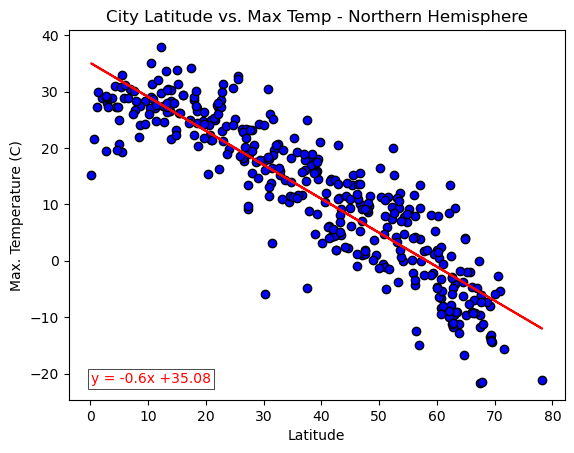

In [26]:
# Linear regression on Northern Hemisphere
param = {"x_values": northern_hemi_df["Lat"],
         "y_values": northern_hemi_df["Max Temp"],
         "hemis": "Northern Hemisphere",
         "y_label": "Max. Temperature (C)",
         "color": "b",
         "fig": 5
}
linear_reg_plots(**param)

The r-value is: 0.7346431393903365


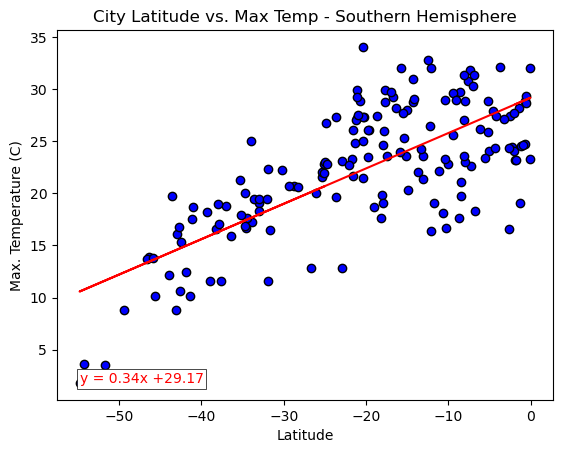

In [27]:
# Linear regression on Southern Hemisphere
param = {"x_values": southern_hemi_df["Lat"],
         "y_values": southern_hemi_df["Max Temp"],
         "hemis": "Southern Hemisphere",
         "y_label": "Max. Temperature (C)",
         "color": "b",
         "fig": 6
}
linear_reg_plots(**param)

**Discussion about the linear relationship:**

- The r-value > 0.7 for both hemispheres shows that there is a strong correlation between the latitude where the city is located and the maximum temperature.
- This correlation can be seen on how the observations are around the regression line.
- The closest the cities get to the equator the highest the maximum temperature is. This is shown with the negative correlation in the northern hemisphere and with the positive correlation in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.25563581222212806


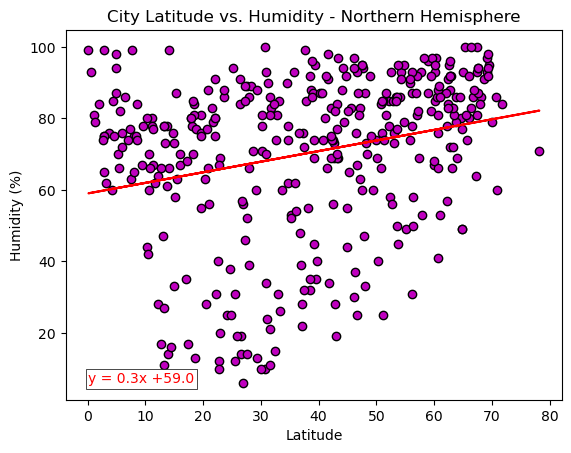

In [29]:
# Northern Hemisphere
param = {"x_values": northern_hemi_df["Lat"],
         "y_values": northern_hemi_df["Humidity"],
         "hemis": "Northern Hemisphere",
         "y_label": "Humidity (%)",
         "color": "m",
         "fig": 7
}
linear_reg_plots(**param)

The r-value is: 0.2127562108145447


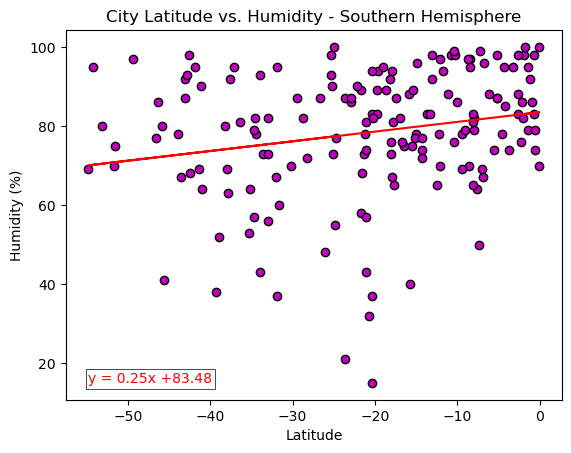

In [30]:
# Southern Hemisphere
param = {"x_values": southern_hemi_df["Lat"],
         "y_values": southern_hemi_df["Humidity"],
         "hemis": "Southern Hemisphere",
         "y_label": "Humidity (%)",
         "color": "m",
         "fig": 8
}
linear_reg_plots(**param)

**Discussion about the linear relationship:**

- The r-value < 0.3 shows there is a very week correlation between the latitude and the humidity.
- This means there is no relation between the distance to the equator and the city humidity %.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12988095412614156


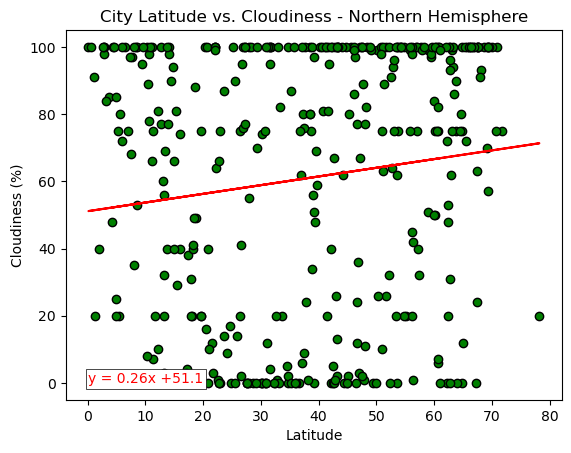

In [31]:
# Northern Hemisphere
param = {"x_values": northern_hemi_df["Lat"],
         "y_values": northern_hemi_df["Cloudiness"],
         "hemis": "Northern Hemisphere",
         "y_label": "Cloudiness (%)",
         "color": "g",
         "fig": 9
}
linear_reg_plots(**param)

The r-value is: 0.15170089709365717


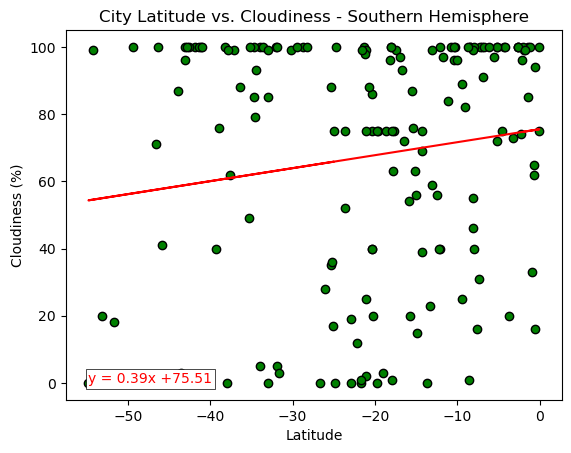

In [32]:
# Southern Hemisphere
param = {"x_values": southern_hemi_df["Lat"],
         "y_values": southern_hemi_df["Cloudiness"],
         "hemis": "Southern Hemisphere",
         "y_label": "Cloudiness (%)",
         "color": "g",
         "fig": 10
}
linear_reg_plots(**param)

**Discussion about the linear relationship:**

- The r-value < 0.3 shows there is a very week correlation between the latitude and the cloudiness.
- This means there is no relation between the distance to the equator and the city cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10916458383048748


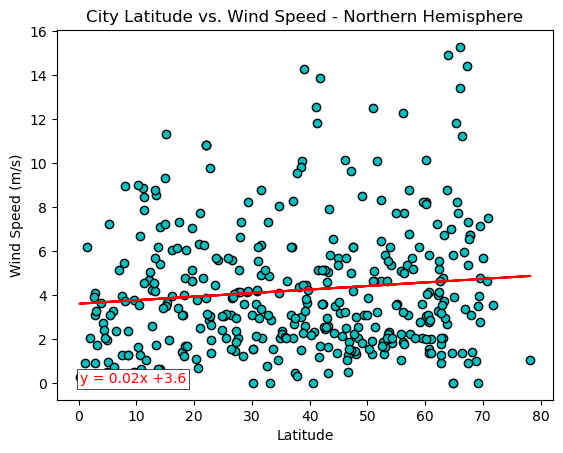

In [33]:
# Northern Hemisphere
param = {"x_values": northern_hemi_df["Lat"],
         "y_values": northern_hemi_df["Wind Speed"],
         "hemis": "Northern Hemisphere",
         "y_label": "Wind Speed (m/s)",
         "color": "c",
         "fig": 11
}
linear_reg_plots(**param)

The r-value is: -0.30597911193644717


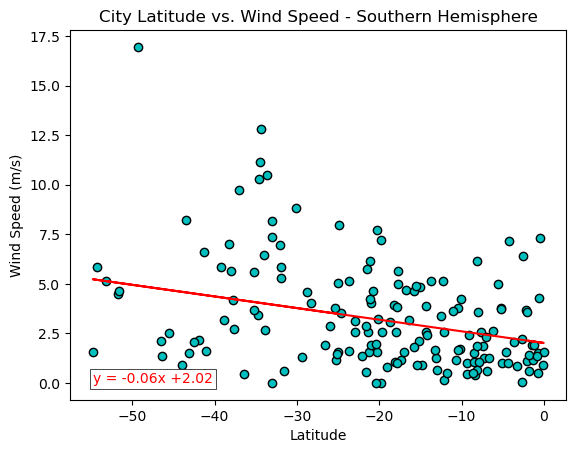

In [34]:
# Southern Hemisphere
param = {"x_values": southern_hemi_df["Lat"],
         "y_values": southern_hemi_df["Wind Speed"],
         "hemis": "Southern Hemisphere",
         "y_label": "Wind Speed (m/s)",
         "color": "c",
         "fig": 12
}
linear_reg_plots(**param)

**Discussion about the linear relationship:**

- The r-value < 0.3 on the northern hemisphere and < 0.5 in the southern hemisphere shows there is a very weak and weak correlation respectively, between the latitude and the wind speed.
- This means there is no relation between the distance to the equator and the city wind speed.